In [2]:
import numpy as np
import pandas as pd

## Attention calculation - 1 (Bahdauni)

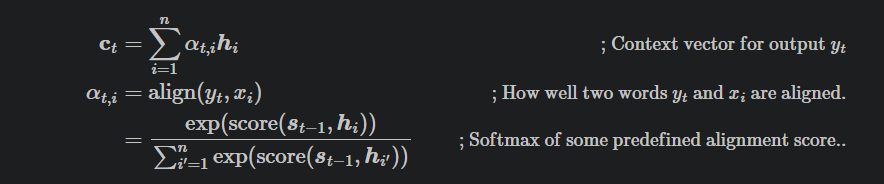



In [20]:
MAX_SENT_LEN = 512
ENC_EMB_DIM = 64
DEC_EMB_DIM = 64
ENC_HID_DIM = 128
DEC_HID_DIM = 128
ATTN_DIM = 32
NUM_LAYERS = 2
NUM_DIR = 2 # bi-directional rnn

Calculating for one example first.

In [60]:
# Encoder outputs
# outputs = [src sent len, batch size, hid dim * num directions] last layer output of gru
# hidden = [n layers * num directions, batch size, hid dim] hidden state output of last token pass through gru

# ignore batch size for trial now
outputs = np.random.randn(MAX_SENT_LEN, NUM_DIR * ENC_HID_DIM)
hidden = np.random.randn(NUM_LAYERS * NUM_DIR, ENC_HID_DIM)

print(outputs.shape, hidden.shape)

(512, 256) (4, 128)


In [61]:
# concatenating first 2 vector which represent the forward and backward hidden states of the last rnn layer
hidden_last = np.concatenate((hidden[-2,:], hidden[-1,:]), axis =0)
hidden_last.shape

(256,)

In [62]:
hidden_last[:10]

array([ 0.12924588, -0.45422537, -1.0635784 , -0.51419676, -0.56808908,
        1.94453206,  1.95759745, -1.14248418,  0.55909504, -0.6161722 ])

In [63]:
hidden_last = np.expand_dims(hidden_last, axis=0)

# hidden_last -> concatenation of last layers forward and backward vectors of rnn
# output -> sentence len, concatenation of last layers forward and backward vectors of rnn
hidden_last.shape, outputs.shape

((1, 256), (512, 256))

In [64]:
# repeat hidden sentence last times
hidden_last_repeat = np.expand_dims(hidden_last, axis=0)
hidden_last_repeat = np.repeat(hidden_last_repeat, repeats=MAX_SENT_LEN, axis=1)
hidden_last_repeat.shape

(1, 512, 256)

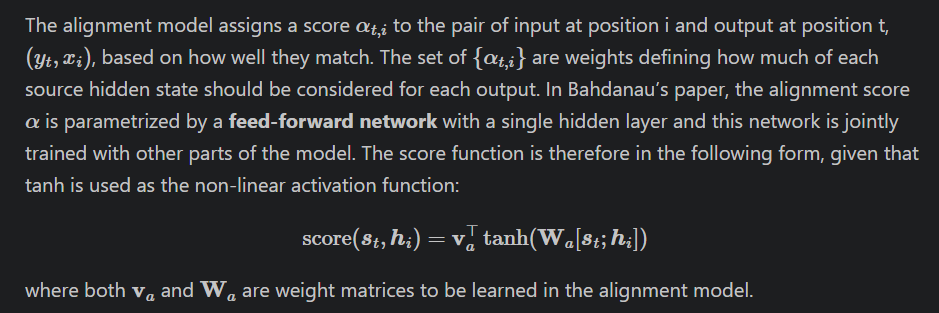


In [67]:

# applying a feed forward layer with tanh as activation function according to the paper
W1 = np.random.randn(ATTN_DIM, ENC_HID_DIM*2)
B1 = np.random.randn(ATTN_DIM, 1)

attn_score_vec = np.tanh(np.dot(W1, outputs.T) + B1)
attn_score_vec.shape


(32, 512)

In [72]:
# parameter v is also learned
W2 = np.random.randn(1, ATTN_DIM)
B2 = np.random.randn(1, 1)

attn_score = np.dot(W2, attn_score_vec) + B2
attn_score.shape = (MAX_SENT_LEN)
attn_score.shape

(512,)

In [74]:
attn_score[:10]

array([-4.81716279, -0.87475815, -1.003926  ,  2.5900362 , -2.49720397,
        0.78325342, -0.17992311, -7.59798101,  1.85473475,  3.68496329])

In [73]:
def softmax(z):
    e_z = np.exp(z)
    sum_e_z = np.sum(e_z)
    return e_z / sum_e_z

In [77]:
score = softmax(attn_score)
score = np.expand_dims(score, axis=0)
score[:, :10]

array([[8.28552733e-09, 4.27055909e-07, 3.75308024e-07, 1.36529281e-05,
        8.43073557e-08, 2.24155816e-06, 8.55554657e-07, 5.13601337e-10,
        6.54468036e-06, 4.08081208e-05]])

In [79]:
weighted_sum = np.dot(score, hidden_last_repeat)
weighted_sum.shape

(1, 1, 256)